# Test: XArray with OPeNDAP Data
Retrieve OPeNDAP data with xarray. 


In [19]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import xarray as xr
import numpy as np

The dataset URL we use for this test resferences a dmr++ file hosted on an Amazon EC2 instance Running Hyrax. THe dmr++ file references (is backed by) an associated data object (in this case an hdf5 file) in S3.

In [24]:
dataset_url = 'http://t41m1.opendap.org:8080/opendap/dmrpp_from_aws_cli/airs/AIRS.2015.01.01.L3.RetStd_IR001.v6.0.11.0.G15013155825.nc.h5.dmrpp'

<xarray.Dataset>
Dimensions:                       (CoarseCloudLayer: 3, EmisFreqIR: 4, EmisFreqMW: 3, FineCloudLayer: 12, H2OPressureLay: 12, H2OPressureLev: 12, Latitude: 180, Longitude: 360, StdPressureLev: 24)
Coordinates:
  * CoarseCloudLayer              (CoarseCloudLayer) float32 865.0 547.0 66.0
  * EmisFreqIR                    (EmisFreqIR) float32 832.0 961.0 1203.0 2616.0
  * EmisFreqMW                    (EmisFreqMW) float32 23.0 50.3 89.0
  * FineCloudLayer                (FineCloudLayer) float32 1018.0 887.0 ... 32.0
  * H2OPressureLay                (H2OPressureLay) float32 961.7692 ... 83.666
  * H2OPressureLev                (H2OPressureLev) float32 1000.0 ... 100.0
  * Latitude                      (Latitude) float64 89.5 88.5 ... -88.5 -89.5
  * Longitude                     (Longitude) float64 -179.5 -178.5 ... 179.5
  * StdPressureLev                (StdPressureLev) float32 1000.0 925.0 ... 1.0
Data variables:
    ClrOLR_A                      (Latitude, Longitude)

Next we open the dataset with xarray, `xr.open_dataset()`, and then show the metadata

In [ ]:
remote_data = xr.open_dataset(dataset_url)
remote_data

Then we select a variable and read it's values:

In [21]:
ClrOLR_A = remote_data['ClrOLR_A'][::1,::1]

In [22]:
ClrOLR_A

<xarray.DataArray 'ClrOLR_A' (Latitude: 180, Longitude: 360)>
array([[    nan,     nan, 175.625, ..., 171.875, 174.125,     nan],
       [171.875, 174.625, 174.25 , ..., 174.875,     nan, 173.125],
       [174.   , 175.125, 173.625, ..., 175.875, 176.   , 175.5  ],
       ...,
       [    nan, 198.25 ,     nan, ..., 193.   , 194.25 , 196.75 ],
       [    nan, 189.125, 192.   , ..., 189.25 , 189.625,     nan],
       [190.875,     nan, 189.75 , ...,     nan, 187.5  ,     nan]],
      dtype=float32)
Coordinates:
  * Latitude   (Latitude) float64 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * Longitude  (Longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    origname:      ClrOLR_A
    fullnamepath:  /ClrOLR_A

And finally plot the selected variable.

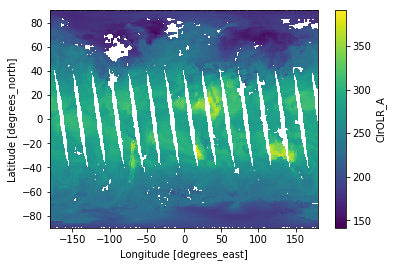

In [23]:
ClrOLR_A.plot()